# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

In [2]:
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def FileImport (nomefile=None, data_array=None):
    with open(nomefile) as fileinput:
        lettore = csv.reader(fileinput,delimiter="\t", quoting=csv.QUOTE_NONNUMERIC)
        for riga in lettore:
            for dato in riga:
                if type(dato)==float:
                    dato = dato
                    data_array.append(dato)

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

# <span style="color:red"> Exercise 01.1 </span>

# Test the Pseudo-Random Number Generator 

For this exercise I used the Pseudo-Random Number Generator dowloaded from the NSL Ariel web site to generate $10^6$ numbers $r$. In the lines below I import the generated numbers to test if $\langle r \rangle - 1/2$ goes to zero as the number of blocks $N$ increases.

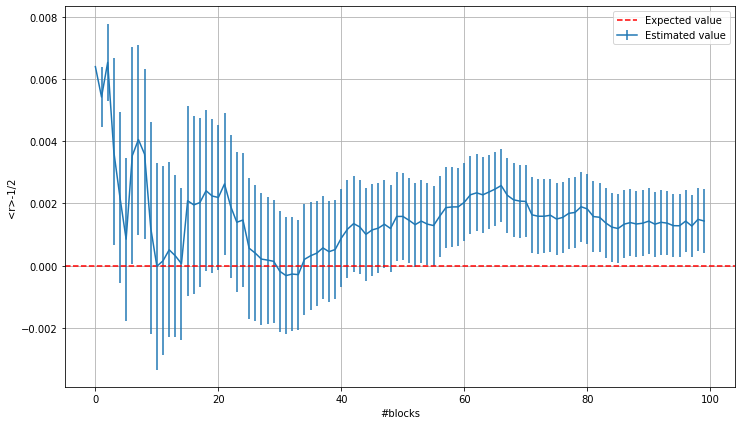

In [2]:
M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block
r = []                # Random numbers vector
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

FileImport ("../Es1/01.1/numbers", r)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += r[k]
    ave[i] = sum/L       # r_i 
    av2[i] = (ave[i])**2 # (r_i)^2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty

#x*=L  Number of throws = block * (Number of throws in each block)
x_block = np.arange(100)
plt.figure(figsize=(12,7))
plt.errorbar(x_block,sum_prog-0.5,yerr=err_prog, label='Estimated value')
plt.axhline(0, color='r', linestyle='--', label='Expected value')
plt.xlabel('#blocks')
plt.ylabel('<r>-1/2')
plt.legend()
plt.grid(True)
plt.show()

2. In the following lines I make the estimation of $\sigma^2$ and its uncertainty to test if $\int_0^1 (r-\frac{1}{2})^2 dr - \frac{1}{12}$ goes to $0$ as $N$ increases. 

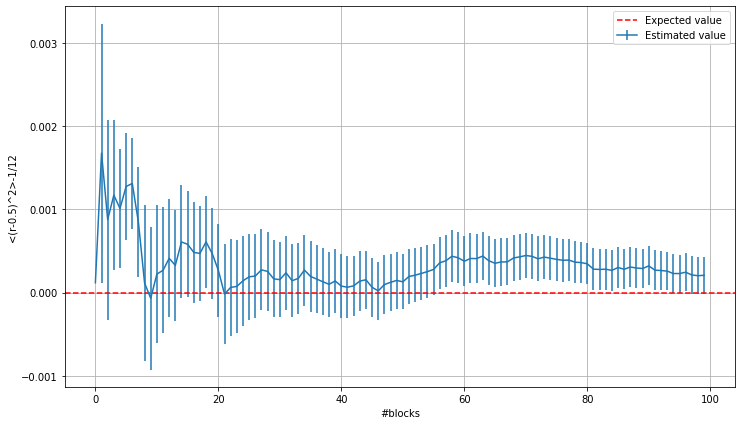

In [3]:
# Continue using variables and functions of the previous code cell
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += (r[k]-0.5)**2 # Accumulate measures
    ave[i] = sum/L           # Estimate in each block 
    av2[i] = (ave[i])**2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
x_block = np.arange(100)
plt.figure(figsize=(12,7))
plt.errorbar(x_block,sum_prog-1/12,yerr=err_prog, label='Estimated value')
plt.axhline(0, color='r', linestyle='--', label='Expected value')
plt.xlabel('#blocks')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.legend()
plt.grid(True)
plt.show()

3. Here I use the $\chi ^ 2$ test to verify if in each sub-interval the numbers r are evenly generated. I divided the interval $[0,1]$ in $100$ sub-intervals each one with $10^4$ throws of $r$. I plotted $\chi _ i$ as a function of the index $j$ of the sub-intervals. Starting from
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
we will expect $\chi^2$ to be similar to the sub-intervals number ($\chi^2\simeq100$)

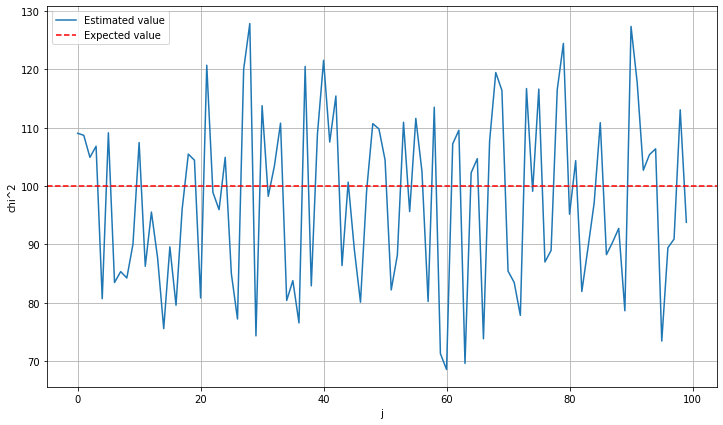

In [3]:
# Continue using the numbers generated for the previous tests
M=100
n=10000
chi2 = [] 
FileImport("../Es1/01.1/chi2", chi2)              #Chi2 depending from intervals

plt.figure(figsize=(12,7))
plt.plot(chi2, label='Estimated value')
plt.axhline(100, color='r', linestyle='--', label='Expected value')
plt.xlabel('j')
plt.ylabel('chi^2')
plt.legend()
plt.grid(True)
plt.show()


# <span style="color:red"> Exercise 01.2 </span>

# Central Limit Theorem
In this exercise I extended the Pseudo-Random Number generator downloaded from the NSL Ariel web site to check the Central Limit Theorem.

I added two probability distributions to the Ariel Random Class, using the method of the **inversion** of the **cumulative** distribution. The target is to distinguish in which cases they can converge to a Gaussian distribution or another Levy Distribution.

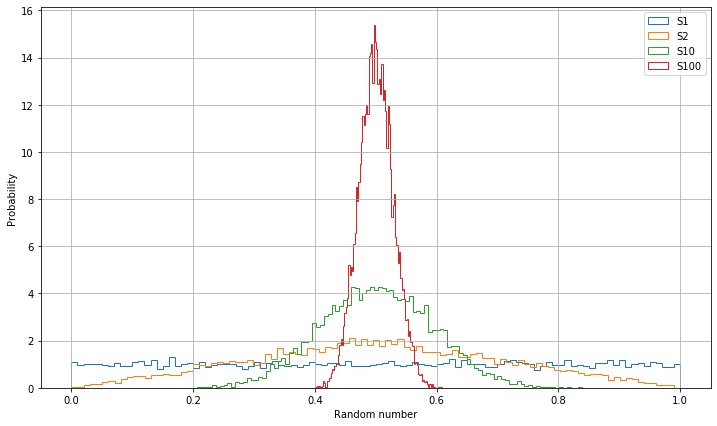

In [13]:
S1_uniform, S2_uniform, S10_uniform, S100_uniform = [], [], [], []
FileImport("../Es1/01.2/S1_uniform", S1_uniform)
FileImport("../Es1/01.2/S2_uniform", S2_uniform)
FileImport("../Es1/01.2/S10_uniform", S10_uniform)
FileImport("../Es1/01.2/S100_uniform", S100_uniform)

n_bins = 100

plt.figure(figsize=(12,7))
plt.hist (S1_uniform, n_bins, density=True, label='S1', histtype='step')
plt.hist (S2_uniform, n_bins, density=True, label='S2', histtype='step')
plt.hist (S10_uniform, n_bins, density=True, label='S10', histtype='step')
plt.hist (S100_uniform, n_bins, density=True, label='S100', histtype='step')
plt.xlabel('Random number')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

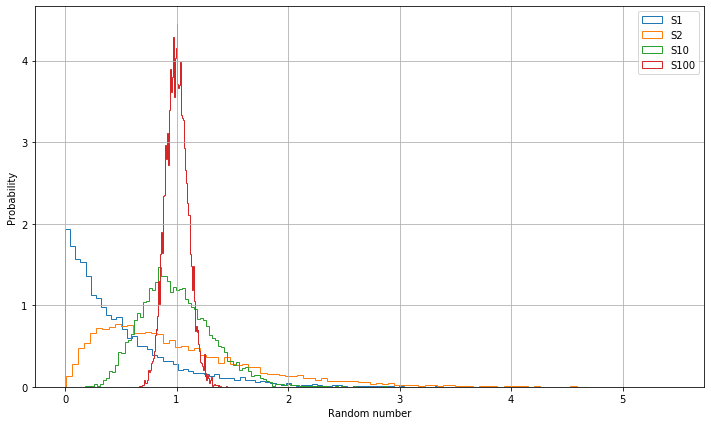

In [14]:
S1_exp, S2_exp, S10_exp, S100_exp = [], [], [], []
FileImport("../Es1/01.2/S1_exp", S1_exp)
FileImport("../Es1/01.2/S2_exp", S2_exp)
FileImport("../Es1/01.2/S10_exp", S10_exp)
FileImport("../Es1/01.2/S100_exp", S100_exp)

n_bins = 100

plt.figure(figsize=(12,7))
plt.hist (S1_exp, n_bins, density=True, label='S1', histtype='step')
plt.hist (S2_exp, n_bins, density=True, label='S2', histtype='step')
plt.hist (S10_exp, n_bins, density=True, label='S10', histtype='step')
plt.hist (S100_exp, n_bins, density=True, label='S100', histtype='step')
plt.xlabel('Random number')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

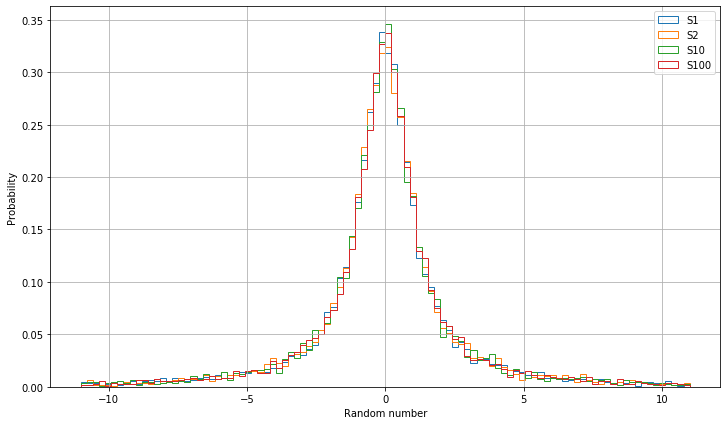

In [15]:
S1_gauss, S2_gauss, S10_gauss, S100_gauss = [], [], [], []
FileImport("../Es1/01.2/S1_gauss", S1_gauss)
FileImport("../Es1/01.2/S2_gauss", S2_gauss)
FileImport("../Es1/01.2/S10_gauss", S10_gauss)
FileImport("../Es1/01.2/S100_gauss", S100_gauss)

n_bins = 100

plt.figure(figsize=(12,7))
plt.hist (S1_gauss, n_bins, density=True, label='S1', range=(-11,11), histtype='step')
plt.hist (S2_gauss, n_bins, density=True, label='S2', range=(-11,11), histtype='step')
plt.hist (S10_gauss, n_bins, density=True, label='S10', range=(-11,11),histtype='step')
plt.hist (S100_gauss, n_bins, density=True, label='S100', range=(-11,11),histtype='step')
plt.xlabel('Random number')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


As we expected from the Central Limit Theorem, the uniform distribution and the exponential one, at N=100, approximate a Gaussian, indeed these distributions are scorrelated and with finite variance. We can say the **Gauss** distribution is an attractor for these 2 distributions.

The Cauchy-Lorentz distribution instead, when $N$ increases, converge to another attractor: the **Cauchy** distribution.

# <span style="color:red"> Exercise 01.3 </span>

# Buffon Needle simulation

In this exercise I extimated the value of $\pi$ using the Buffon Needle simulation. I used a needle lenght $L=1.5$ and a distance between lines $d=2.5$ in order to have a probability $P = 2L/\pi d \approx 0.38$. I made $N=100$ simulations for $\pi$ over $10000$ throws each. 

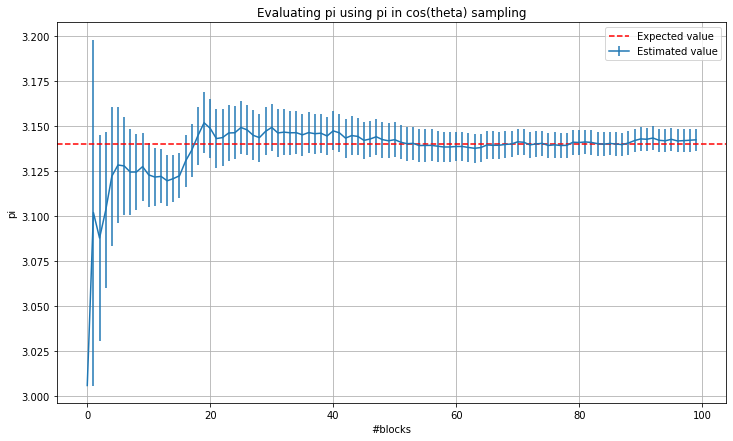

In [7]:
N=100                 # Number of blocks
approx_Pi = []        #Pi approximations over 10000 throws
sum_prog=np.zeros(N)
su2_prog=np.zeros(N)
err_prog=np.zeros(N)

FileImport ("../Es1/01.3/pi_eval.out", approx_Pi)
for i in range(N):
    for j in range(i+1):
        sum_prog[i] += approx_Pi[j] 
        su2_prog[i] += approx_Pi[j]*approx_Pi[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
#x*=L  Number of throws = block * (Number of throws in each block)
x_block = np.arange(100)
plt.figure(figsize=(12,7))
plt.errorbar(x_block, sum_prog, yerr=err_prog, label='Estimated value')
plt.axhline(3.14, color='r', linestyle='--', label='Expected value')
plt.title('Evaluating pi using pi in cos(theta) sampling')
plt.xlabel('#blocks')
plt.ylabel('pi')
plt.legend()
plt.grid(True)
plt.show()

This value well approximates the true pi value.

If we take advantage of the system symmetries we can also rearrange the system and use the **rejection tecnique** to sample $cos(\theta)$ only in the 1st quadrant and do not use $\pi$ to sample $\pi$! Below the results:

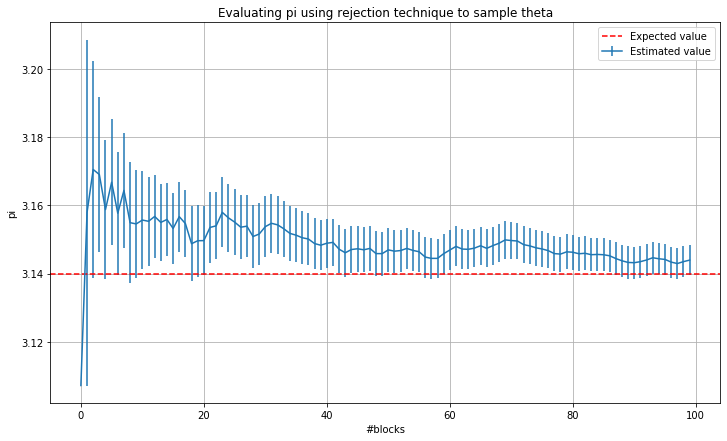

In [6]:
N=100                 # Number of blocks
approx_Pi = []        #Pi approximations over 10000 throws
sum_prog=np.zeros(N)
su2_prog=np.zeros(N)
err_prog=np.zeros(N)

FileImport ("../Es1/01.3/pi_eval_rej.out", approx_Pi)
for i in range(N):
    for j in range(i+1):
        sum_prog[i] += approx_Pi[j] 
        su2_prog[i] += approx_Pi[j]*approx_Pi[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
#x*=L  Number of throws = block * (Number of throws in each block)
x_block = np.arange(100)
plt.figure(figsize=(12,7))
plt.errorbar(x_block, sum_prog, yerr=err_prog, label='Estimated value')
plt.axhline(3.14, color='r', linestyle='--', label='Expected value')
plt.title("Evaluating pi using rejection technique to sample theta")
plt.xlabel('#blocks')
plt.ylabel('pi')
plt.legend()
plt.grid(True)
plt.show()

As we can see from the comparison of the pictures that if we use $\pi$ to sample $\pi$ the evaluation is more accurate (but actually not so usefull if we are trying to find $\pi$).